# debug.ComputeFractions

In [7]:
import numpy as np
import pandas as pd
import astropy.io.ascii as at

In [8]:
import sys
sys.path.append('/Users/jesteves/Documents/GitHub/galaxyFormation/scripts/')

from compute_fractions import computeFraction


In [68]:
import sys

sys.path.append('../scripts/')
from file_loc import FileLocs
from utils import check_non_valid_number

from file_loc import FileLocs
fl = FileLocs(dataset='tng')

print('--------Initial Files-------')
cluster_file = fl.cls_fname
cluster_file_2 = cluster_file.split('.csv')[0]+'_frac.csv'

print('Cluster File %s'%cluster_file_2)

cat = fl.cat
gal0 = fl.gal0

print(gal0.colnames)
mask = np.abs(gal0['vlosn']) <= 5.
mask &= np.array(gal0['mass'])>10.05
gal = gal0[mask].copy()

print('Seting Variables')
print()
cid = np.array(cat['HaloID'])
gid = np.array(gal['HostHaloID'])

rn = np.array(gal['Rn'])
mass = np.array(gal['mass'])
t_infall = np.array(gal['t_cross'])/1e9

# sfr classification
sf   = np.array(gal['SF']).astype(int)
qf   = (1-sf).astype(int)

# sfr classification
sf   = np.array(gal['SF']).astype(int)
qf   = (1-sf).astype(int)

# morphological classification
s0   = check_non_valid_number(gal['BT'])

# orbital classification
Pi   = np.array(gal['pinfall'])
Po   = np.array(gal['porbital'])
Pn   = np.array(gal['pinterloper'])
m200 = np.array(gal['M200'])

# Pn = np.where(gal['Rn']<=0.20,0.,Pn)
# Po = np.where(gal['Rn']>=2.5,0.,Po)

msbins = np.arange(10.1,11.75,0.1)
rbins = np.arange(0.,3.35,0.35)
tbins = np.logspace(8.2,11.2,31)/1e9/2.   #infall time

# msbins = np.linspace(9.05,11.7,50)
msbins = np.arange(10.05,11.75,0.1)
rbins = np.arange(0.,3.10,0.1)

q = computeFraction('quenching',path=fl.data_loc+'tng/')
q.add_probabilities(qf,Po,Pi,Pn)
q.run_kde('smass', mass, msbins, write=True, nBootStrap=100, bw=0.3)
q.run_kde('cross_time',np.log10(t_infall),tbins,write=True,nBootStrap=100,bw=0.4)
q.run_kde('radii', rn, rbins, write=True, nBootStrap=100, bw=0.2)

# # q = computeFraction('quenching-all',path=fl.data_loc+'tng/')
# # q.add_probabilities(qf,Po,Po+Pi,Pn)
# # q.run('smass',mass,msbins,write=True,nBootStrap=2000)
# # q.run('cross_time',t_infall,tbins,write=True,nBootStrap=2000)
# # q.run('radii',rn,rbins,write=True,nBootStrap=2000)

# q = computeFraction('bulge',path=fl.data_loc+'tng/')
# q.add_probabilities(s0,Po,Pi,Pn)
# q.run('smass',mass,msbins,write=True,nBootStrap=2000)
# q.run('cross_time',t_infall,tbins,write=True,nBootStrap=2000)
# q.run('radii',rn,rbins,write=True,nBootStrap=2000)


--------Initial Files-------
Cluster File ../data/TNG300-1_GalEvol_z0p00_cluster_post_frac.csv
['HostHaloID', 'R', 'vlos', 'mass', 'mass_bulge', 'BT', 'age', 't_cross', 't_infall', 'M200', 'R200', 'Rn', 'vlosn', 'infall', 'orbital', 'interloper', 'pinfall', 'porbital', 'pinterloper', 'ssfr', 'log_sfr', 'SF']
Seting Variables

Welcome to our cluster enviromental effects tools
probablity: quenching


<ipython-input-68-bc8c58ec25d0>:64: RuntimeWarning: divide by zero encountered in log10
  q.run_kde('cross_time',np.log10(t_infall),tbins,write=True,nBootStrap=100,bw=0.4)


In [69]:
from file_loc import FileLocs
from utils import check_non_valid_number

fl = FileLocs()
galaxy_file = fl.gal_fname1
outfile_base = fl.data_loc+'tmp/{label}_{var}.npy'

print('--------Initial Files-------')
print('Galaxy File : %s' % galaxy_file)
print()

# load catalogs
gal0 = at.read(galaxy_file)

mask = np.abs(gal0['vlosn']) <= 5.
mask &= gal0['ssfr']>=-20
mask &= np.array(gal0['mass'])>10.05

gal = gal0[mask].copy()

print('Seting Variables')
print()
gid = np.array(gal['Yang'])

rn = np.array(gal['Rn'])
mass = np.array(gal['mass'])
t_infall = np.array(gal['t_infall'])/1e9
morph_type = np.array(gal['TType'])
ssfr = np.array(gal['ssfr'])
# sfr classification
sf   = np.array(gal['SF']).astype(int)
qf   = (1-sf).astype(int)

# morphological classification
sp   = np.where(gal['TType'] > 0, 1, 0).astype(int)
ell  = np.where(gal['TType'] <=0, 1, 0).astype(int)
s0   = check_non_valid_number(gal['Pbulge'])
s0[np.isnan(s0)] = 0.
#s0   = check_non_valid_number(gal['PS0'])
#disk = check_non_valid_number(gal['Pdisk'])
#bar  = check_non_valid_number(gal['PbarGZ2'])
#merger= check_non_valid_number(gal['Pmerg'])

Pi   = np.array(gal['pinfall'])
Po   = np.array(gal['porbital'])
Pn   = np.array(gal['pinterloper'])
m200 = np.array(gal['M200'])

# Pn = np.where(gal['Rn']<=0.20,0.,Pn)
# Po = np.where(gal['Rn']>=2.5,0.,Po)

msbins = np.arange(10.1,11.75,0.1)
rbins = np.arange(0.,3.35,0.35)
tbins = np.logspace(8.2,11.2,31)/1e9/2.   #infall time

# msbins = np.linspace(9.05,11.7,50)
msbins = np.arange(10.05,11.75,0.1)
rbins = np.arange(0.,3.10,0.1)

q = computeFraction('quenching',path=fl.data_loc)
q.add_probabilities(qf,Po,Pi,Pn)
q.run_kde('smass', mass, msbins, write=True, nBootStrap=100, bw=0.3)
q.run_kde('cross_time',np.log10(t_infall),tbins,write=True,nBootStrap=100,bw=0.4)
q.run_kde('radii', rn, rbins, write=True, nBootStrap=100, bw=0.2)

# q.run('smass', mass, msbins, write=True, nBootStrap=200)
# q.run('cross_time',t_infall,tbins,write=True,nBootStrap=500)
# q.run_kde('radii', rn, rbins, write=True, nBootStrap=200, bw=0.3)

# q = computeFraction('bulge',path=fl.data_loc)
# q.add_probabilities(s0,Po,Pi,Pn)
# q.run('smass',mass,msbins,write=True,nBootStrap=500)
# q.run('cross_time',t_infall,tbins,write=True,nBootStrap=500)
# q.run('radii',rn,rbins,write=True,nBootStrap=500)

# q.run('ttype',morph_type,mrpbins,write=True,nBootStrap=500)

--------Initial Files-------
Galaxy File : ../data/groups_deCarvalho2017_galaxies_final_flag_johnnyheq_volumeLimited_v1.csv

Seting Variables

Welcome to our cluster enviromental effects tools
probablity: quenching


In [42]:
import matplotlib.pyplot as plt

In [43]:
def plot_profile(x,frac,**args):
    ymed = np.median(frac,axis=1)
    error_low = ymed-np.percentile(frac,16,axis=1)
    error_high = np.percentile(frac,84,axis=1)-ymed
    plt.errorbar(x,np.median(frac,axis=1),yerr=np.vstack([error_low, error_high]),**args)

In [44]:
import sys
sys.path.append('/Users/jesteves/Documents/GitHub/galaxyFormation/scripts/')

from compute_fractions import computeFraction


In [45]:
xlabels = {'cross_time':r't$_{cross}$ [Gyr]','smass':r'Log($M_\star/M_{\odot}$)','radii':r'R/R$_{200}$'}

In [46]:
file_base = fl.data_loc+'/tmp/{xlabel}_{name}.npy'
file_base_tng = fl.data_loc+'tng/'+'/tmp/{xlabel}_{name}.npy'

In [47]:
label1 = ['Orbital', 'Infall', 'Interlopers']
label2 = ['Orbital-Infall', 'Orbital-Interlopers', 'Infall-Interlopers']

def get_percentile(y):
    a1,a2,a3 = np.nanpercentile(y,[25,50,75])
    ylow,yhig = a1-3.*(a3-a1)/2.,a3+3.*(a3-a1)/2.
    return ylow,yhig


def plot_fraction_pannel(xlabel, name, xscale=False, save=None):
    if xlabel=='cross_time':
        xscale = True

    x = np.loadtxt(file_base.format(xlabel=xlabel, name=name)).T
    x_tng = np.loadtxt(file_base_tng.format(xlabel=xlabel, name=name)).T
    
    plt.clf()
    fig = plt.figure(figsize=(
        12,4))
    plt.subplot(1, 2, 1)
    
    count = np.zeros_like(x[0])
    for i in range(3):
        ii = 3*i + 1
        p = plt.errorbar(x[0], x[ii], yerr=np.vstack([x[ii+1],x[ii+2]]), ls='-', label=label1[i], fmt='o')
        plt.errorbar(x_tng[0], x_tng[ii], yerr=np.vstack([x_tng[ii+1],x_tng[ii+2]]), ls='--', fmt='x',color=p[0].get_color())
    
    if xscale:
        plt.xscale('log')
    plt.legend(fontsize=12)
    plt.xlabel(xlabels[xlabel],fontsize=18)
    #plt.xlabel(r'Log($M_\star/M_{\odot}$)',fontsize=16)
    plt.title('%s Fraction'%name,fontsize=16)
    
    plt.subplot(1, 2, 2)
    for i in range(3):
        ii = (3*i + 1)+9
        x[ii] = np.where(x[ii]<-.75,np.nan,x[ii])
        p = plt.errorbar(x[0], x[ii], yerr=np.vstack([x[ii+1],x[ii+2]]), label=label2[i], ls='-', fmt='o')
        plt.errorbar(x_tng[0], x_tng[ii], yerr=np.vstack([x_tng[ii+1],x_tng[ii+2]]), ls='--', fmt='x',color=p[0].get_color())
    
    plt.axhline(0.,ls='--',lw=4,color='lightgray')
    plt.xlabel(xlabels[xlabel],fontsize=18)
    plt.legend()
    plt.title('%s Fraction Excess'%name.capitalize(),fontsize=16)
    if xscale:
        plt.xscale('log')
    del x
    
    if save is not None:
        plt.savefig(save, transparent=False)
        plt.clf()

<Figure size 432x288 with 0 Axes>

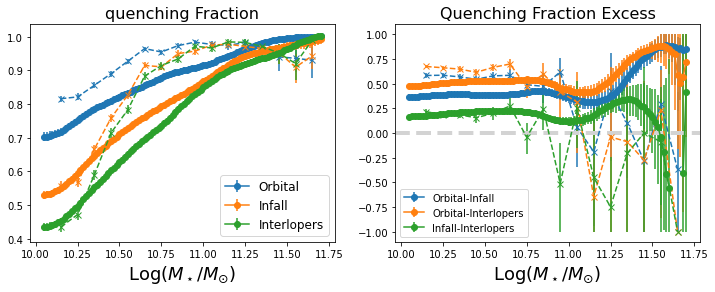

In [37]:
plot_fraction_pannel('smass','quenching')

<Figure size 432x288 with 0 Axes>

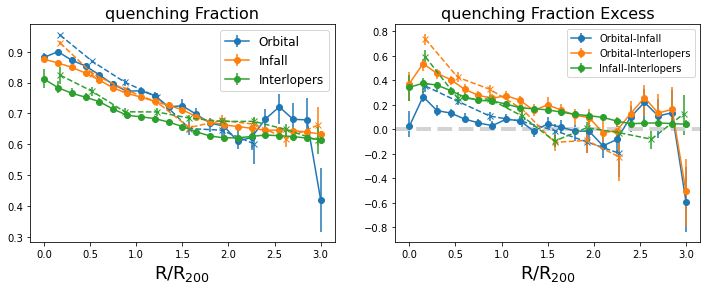

In [30]:
plot_fraction_pannel('radii','quenching')

<Figure size 432x288 with 0 Axes>

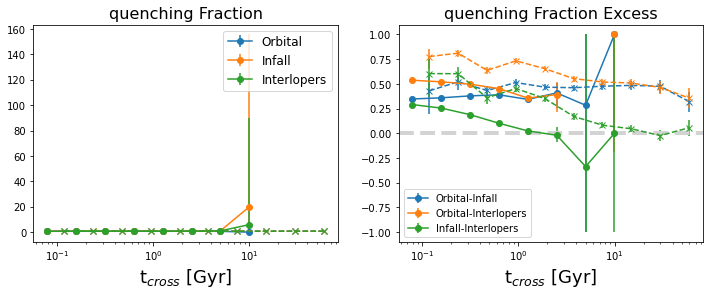

In [31]:
plot_fraction_pannel('cross_time','quenching')

<Figure size 432x288 with 0 Axes>

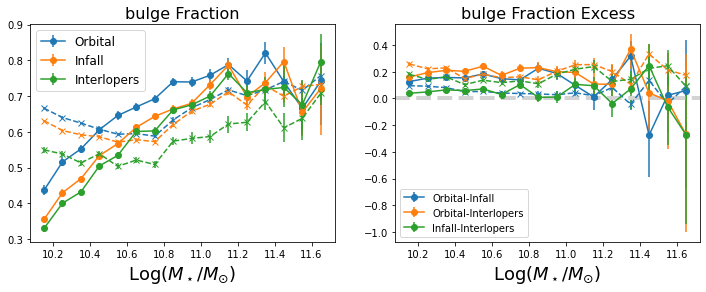

In [32]:
plot_fraction_pannel('smass','bulge')

<Figure size 432x288 with 0 Axes>

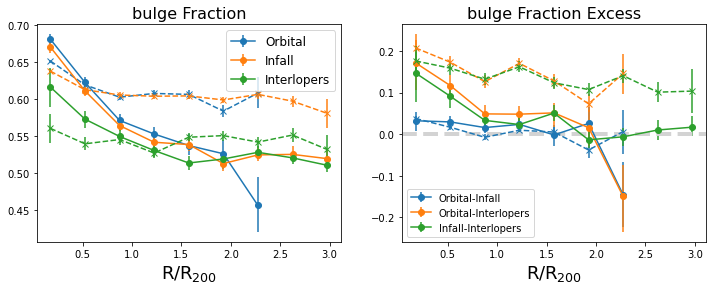

In [33]:
plot_fraction_pannel('radii','bulge')

<Figure size 432x288 with 0 Axes>

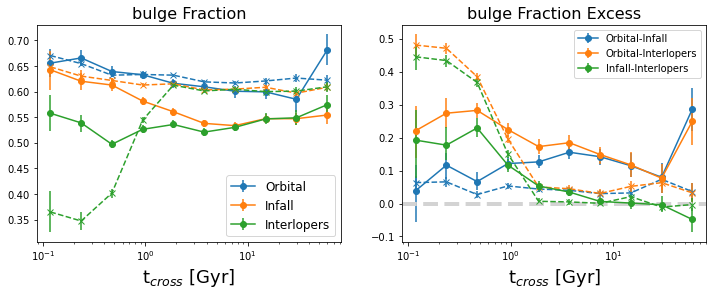

In [34]:
plot_fraction_pannel('cross_time','bulge')

<Figure size 432x288 with 0 Axes>

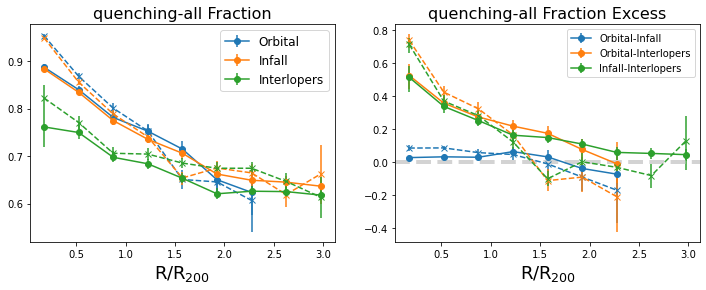

In [35]:
plot_fraction_pannel('radii','quenching-all')

<Figure size 432x288 with 0 Axes>

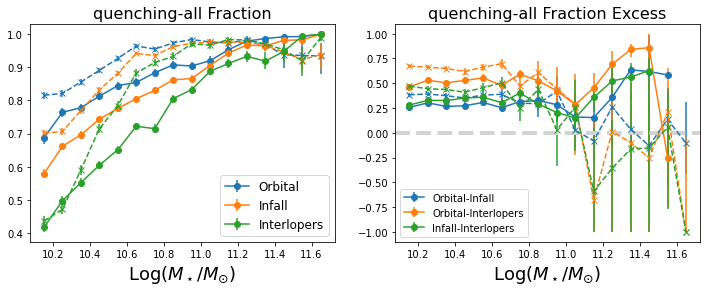

In [19]:
plot_fraction_pannel('smass','quenching-all')

In [42]:
x = np.loadtxt(file_base.format(xlabel='radii', name='quenching')).T

In [82]:
q = computeFraction('elliptical',path=fl.data_loc)
q.add_probabilities(ell,Po,Pi,Pn)
q.run('smass',mass,msbins,write=True,nBootStrap=500)
q.run('cross_time',t_infall,tbins,write=True,nBootStrap=500)
q.run('radii',rn,rbins,write=True,nBootStrap=500)

Welcome to our cluster enviromental effects tools
probablity: elliptical


/Users/jesteves/Documents/GitHub/galaxyFormation/scripts/compute_fractions.py:81: RuntimeWarning: invalid value encountered in double_scalars
  frac = N1/N2
/Users/jesteves/Documents/GitHub/galaxyFormation/scripts/compute_fractions.py:88: RuntimeWarning: invalid value encountered in true_divide
  qfe = dfrac/(1-fq1)
/Users/jesteves/Documents/GitHub/galaxyFormation/scripts/compute_fractions.py:88: RuntimeWarning: divide by zero encountered in true_divide
  qfe = dfrac/(1-fq1)
/usr/local/anaconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/usr/local/anaconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


<Figure size 432x288 with 0 Axes>

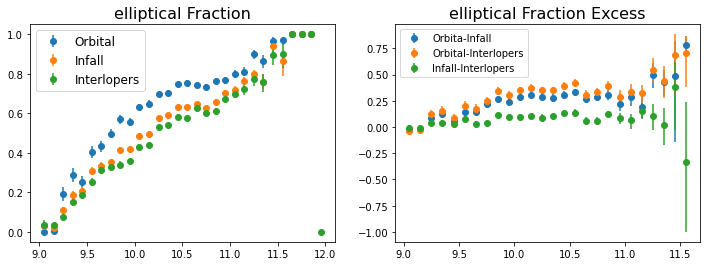

In [83]:
plot_fraction_pannel('smass','elliptical')

<Figure size 432x288 with 0 Axes>

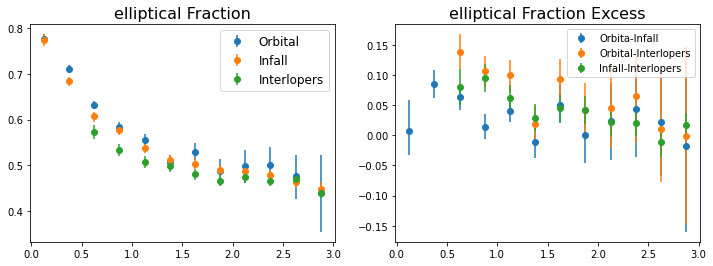

In [84]:
plot_fraction_pannel('radii','elliptical')

<Figure size 432x288 with 0 Axes>

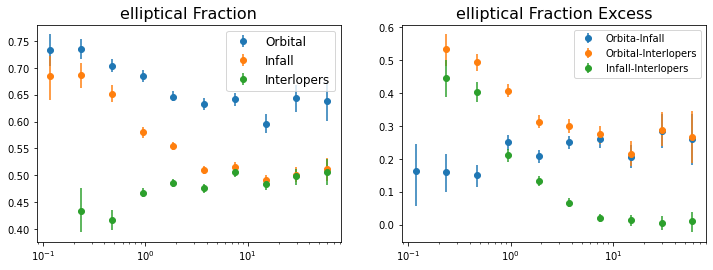

In [85]:
plot_fraction_pannel('cross_time','elliptical')

In [175]:
q = computeFraction('bulge',path=fl.data_loc)
q.add_probabilities(bulge,Po,Pi,Pn)
q.run('smass',mass,msbins,write=True,nBootStrap=500)
q.run('cross_time',t_infall,tbins,write=True,nBootStrap=500)
q.run('radii',rn,rbins,write=True,nBootStrap=500)

Welcome to our cluster enviromental effects tools
probablity: bulge


/Users/jesteves/Documents/GitHub/galaxyFormation/scripts/compute_fractions.py:81: RuntimeWarning: invalid value encountered in double_scalars
  frac = N1/N2
/usr/local/anaconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/usr/local/anaconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


<Figure size 432x288 with 0 Axes>

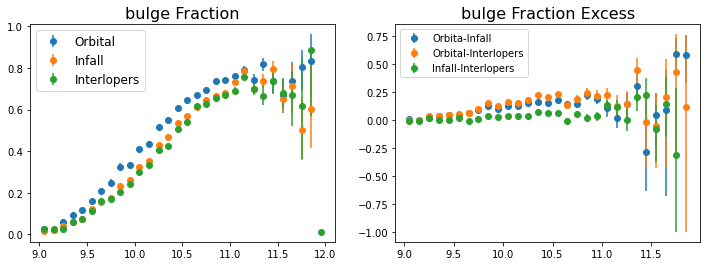

In [176]:
plot_fraction_pannel('smass','bulge')

<Figure size 432x288 with 0 Axes>

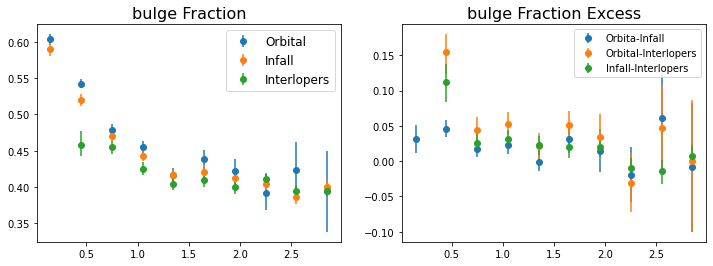

In [177]:
plot_fraction_pannel('radii','bulge')

<Figure size 432x288 with 0 Axes>

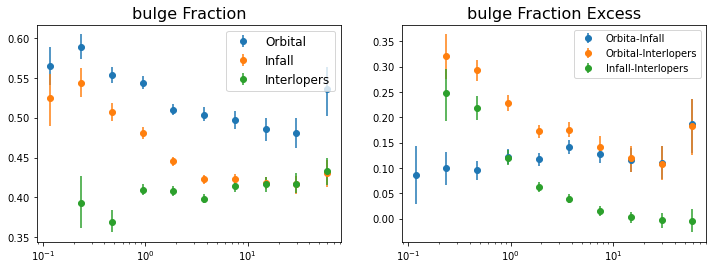

In [178]:
plot_fraction_pannel('cross_time','bulge')

In [94]:
msbins2 = np.arange(9.0,11.5,0.25)

In [95]:
q = computeFraction('spiral',path=fl.data_loc)
q.add_probabilities(sp,Po,Pi,Pn)
q.run('smass',mass,msbins,write=True,nBootStrap=500)
q.run('cross_time',t_infall,tbins,write=True,nBootStrap=500)
q.run('radii',rn,rbins,write=True,nBootStrap=500)

Welcome to our cluster enviromental effects tools
probablity: spiral


<Figure size 432x288 with 0 Axes>

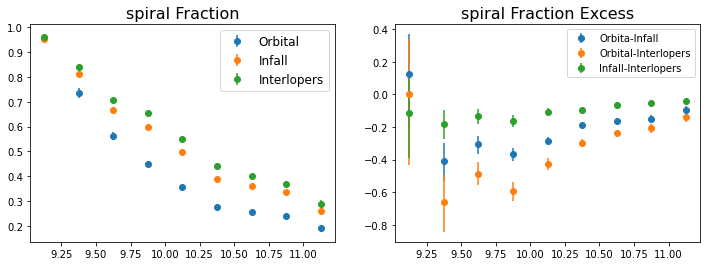

In [96]:
plot_fraction_pannel('smass','spiral')

<Figure size 432x288 with 0 Axes>

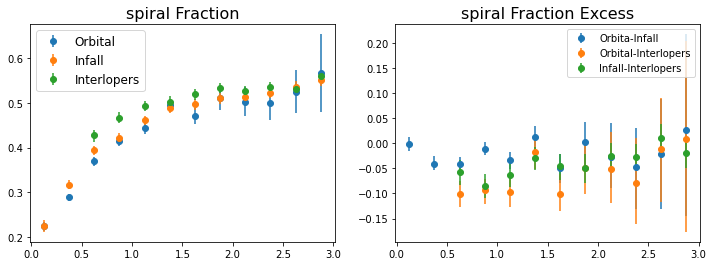

In [97]:
plot_fraction_pannel('radii','spiral')

<Figure size 432x288 with 0 Axes>

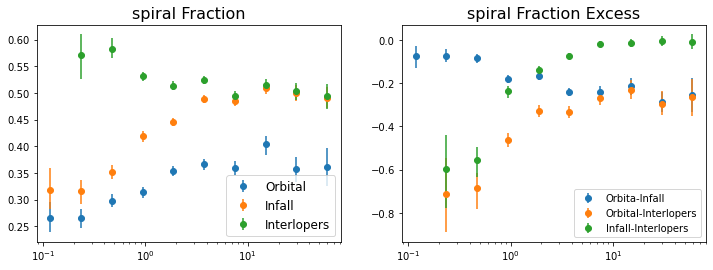

In [98]:
plot_fraction_pannel('cross_time','spiral')

In [143]:
np.count_nonzero(ssfr<-100)

0

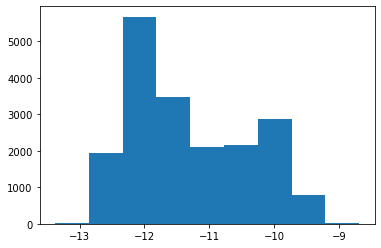

In [160]:
n,ssfrbins,_ = plt.hist(ssfr,weights=Po+Pi,bins=9)

In [161]:
ssfrbins

array([-13.3791    , -12.85838156, -12.33766311, -11.81694467,
       -11.29622622, -10.77550778, -10.25478933,  -9.73407089,
        -9.21335244,  -8.692634  ])